#**Modelo 1: XGBoost**

In [ ]:
import pandas as pd
import numpy as np
import joblib
from joblib import dump, load
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score, make_scorer)
import tensorflow as tf
from tensorflow import keras
np.random.seed(1)
tf.random.set_seed(1)
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV, train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report , f1_score, make_scorer, precision_score, recall_score, accuracy_score,f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score


import nltk
nltk.download('stopwords')
stopwords_es = nltk.corpus.stopwords.words('spanish')

import nltk
import string

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train = pd.read_csv("train_normalizado.csv", engine = "python", error_bad_lines=False)

In [ ]:
df_train.head(5)

,ID,review_es,sentimiento,sentimiento_1
0,0,críticos mencionado después ver solo 1 oz epis...,positivo,1
1,1,pequeña pequeña producción técnica filmación i...,positivo,1
2,2,pensé manera maravillosa pasar tiempo fin sema...,positivo,1
3,3,básicamente familia niño pequeño jake piensa z...,negativo,0
4,4,amor tiempo petter mattei película visualmente...,positivo,1


In [ ]:
datos_faltantes = df_train.isnull().sum()
print(datos_faltantes)

ID               0
review_es        0
sentimiento      0
sentimiento_1    0
dtype: int64


In [ ]:
df_copy_id = df_train['ID']
df_train.drop(columns = (['sentimiento','ID']))

,review_es,sentimiento_1
0,críticos mencionado después ver solo 1 oz epis...,1
1,pequeña pequeña producción técnica filmación i...,1
2,pensé manera maravillosa pasar tiempo fin sema...,1
3,básicamente familia niño pequeño jake piensa z...,0
4,amor tiempo petter mattei película visualmente...,1
...,...,...
23234,peter coyote único nombre reconocí lista proye...,1
23235,odio personas cine hablan nuevo pantalla razon...,0
23236,película dennis hopper gary busey erika elenia...,1
23237,ahorre dinero sido fan fullmoon productions ti...,0


In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_pred,y_test))

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [ ]:

#Creo un dataset con los features que voy a usar para clasificar
df_train_x = df_train['review_es']

#Creo un dataset con la variable target
df_train_y = df_train['sentimiento_1'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(df_train_x,
                                                    df_train_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    stratify=df_train_y.values) #semilla

Implementamos el modelo **Bag of Words**

Obtenemos un dataframe del vocabulario

In [ ]:
vector = CountVectorizer()

X = vector.fit_transform(df_train_x)

vocabulario_df = pd.DataFrame(X.toarray(), columns=vector.get_feature_names_out())
vocabulario_df

,00,000,00000,00000001,00001,0001,001,003830,0069,007,...,útil,útiles,útilmente,über,übermenschlich,überwoman,ünfaful,üvegtigris,üzümcü,żmijewski
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Y ahora obtenemos una lista de todo el vocabulario que se encuentra en las reseñas

In [ ]:

vocabulario = vector.get_feature_names_out()
print(vocabulario)

['00' '000' '00000' ... 'üvegtigris' 'üzümcü' 'żmijewski']


##XGBOOST

In [ ]:
import xgboost as xg_boost
xg_model = make_pipeline(TfidfVectorizer(), xg_boost.XGBClassifier())

In [ ]:

xg_model.fit(x_train,y_train) #Entrenamos el modelo
y_pred_Xg = xg_model.predict(x_test) #Realizamos el predict

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      3385
           1       0.84      0.81      0.83      3587

    accuracy                           0.83      6972
   macro avg       0.83      0.83      0.83      6972
weighted avg       0.83      0.83      0.83      6972



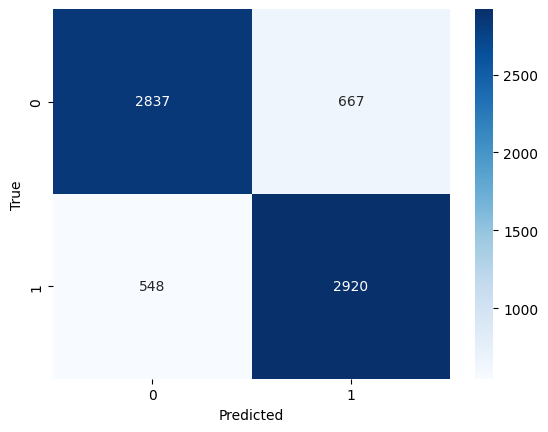

In [ ]:
metricas(y_pred_Xg,y_test)

##XG-Boost modelo 2, agrego hiperparámetros

In [ ]:
estimadores = [90, 100, 110, 150]
frecuencia_maxima = [0.9, 0.95, 0.98]
frecuencia_minima = [0.05, 0.07, 0.03]
profundidad_max = [7, 8, 9, 10, 15]
learning_rate = [0.01, 0.05, 0.1, 0.2]
metrica = make_scorer(sklearn.metrics.f1_score)
folds = 5

parametros = {
  'tfidfvectorizer__stop_words': ['english', stopwords_es],
  'tfidfvectorizer__max_df': frecuencia_maxima,
  'tfidfvectorizer__min_df': frecuencia_minima,
  'tfidfvectorizer__ngram_range': [(1,1), (1,2)],
  'xgbclassifier__n_estimators': estimadores,
  'xgbclassifier__max_depth': profundidad_max,
  'xgbclassifier__learning_rate': learning_rate,
}

modelo = make_pipeline(TfidfVectorizer(), xg_boost.XGBClassifier())

modelo_rcv = RandomizedSearchCV(modelo, parametros, cv=folds, scoring = metrica)
modelo_rcv.fit(df_train_x, df_train_y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_poli...
                                        'tfidfvectorizer__stop_words': ['english',
                                                                        ['de',
                                                                         'la',
                                                                         'que',
                                                                         'el',
                                                                         'en',
                                                                         'y',
                                                                         'a',
                                                                         'los',
                                                                         'del',
                                                                         'se',
                                                                         'las',
                                                                         'por',
                                                                         'un',
                                                                         'para',
                                                                         'con',
                                                                         'no',
                                                                         'una',
                                                                         'su',
                                                                         'al',
                                                                         'lo',
                                                                         'como',
                                                                         'más',
                                                                         'pero',
                                                                         'sus',
                                                                         'le',
                                                                         'ya',
                                                                         'o',
                                                                         'este',
                                                                         'sí',
                                                                         'porque', ...]],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.05,
                                                                         0.1,
                                        

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3221
           1       0.95      0.88      0.91      3751

    accuracy                           0.91      6972
   macro avg       0.91      0.91      0.91      6972
weighted avg       0.91      0.91      0.91      6972



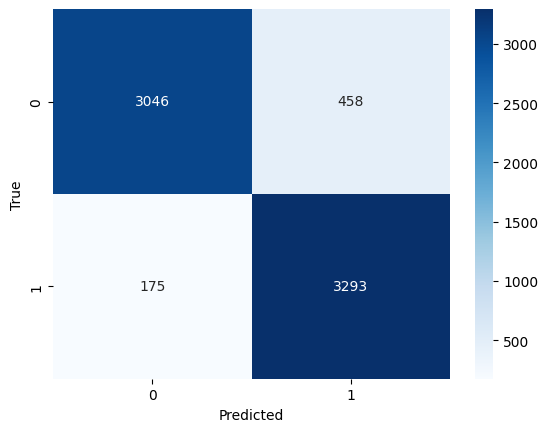

In [ ]:
# Extraer el mejor modelo del RandomizedSearchCV
mejor_modelo = modelo_rcv.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(x_test)

# Calcular y mostrar las métricas
metricas(y_pred, y_test)
plt.show()

##Preprosesamiento de Test

In [ ]:
df_test  = pd.read_csv("test_normalizado.csv", engine="python")
df_copy_id_test = df_test['ID'] #copio el id y lo quito del dataframe
df_test.drop(['ID'], axis='columns', inplace=True)
df_test.head(5)

,review_es
0,mayor virtud película existencia hecho podamos...
1,experto cinéfilo pocas veces tan juego sala ci...
2,si incondicional humor estilo tele 5 si termin...
3,sé pasando si gente deja llevar modas si verda...
4,"amanece,y quedo solo,siento fondoun mar vacío,..."


##SUBMIT XGBoost

In [ ]:
y_submit_xg_h = mejor_modelo.predict(df_test['review_es'])

In [ ]:
df_submit_test = pd.DataFrame({'ID': df_copy_id_test,'sentimiento':y_submit_xg_h})
df_submit_test['sentimiento'] = np.where(df_submit_test['sentimiento'] == 1, 'positivo', 'negativo')

df_submit_test.to_csv('Submit_test_Xg.csv',index = False)